# Data input and output

In day-to-day engineering practice, we are process large volumes of data coming in form multiple sources. Unfortunately, many of the files we receive lack a standardized format and we have to coerce file contents into a workable format.

Python can signficantly reduce the burden of working with .txt, .csv and Excel files by efficiently reading them. The ```Pandas``` library was specifically developed to make data processing easier.

In this notebook, we will demonstrate the file I/O capabilities of Pandas based on a number of examples.

## 1. Library imports

We need to import Pandas.

In [1]:
import pandas as pd
import numpy as np

## 2. Example 1: Importing flowline route data from csv

In many projects, we will receive cable or pipeline route data in .csv (comma separated value) format. We can use Pandas to read the csv. Let's look at the result of the ```read_csv``` function without optional arguments. We can used ```head()``` to only display to top rows of data.

In [2]:
pd.read_csv("Data/Profile 16in Production Flowline GS4 East - 17-04-2018.csv").head()

,Centreline Route Profile - GIS - Unsmoothed,Unnamed: 1,Unnamed: 2,Unnamed: 3,"""-10m Left Wingline Route Profile - GIS - Unsmoothed""",Unnamed: 5,Unnamed: 6,"""+10m Left Wingline Route Profile - GIS - Unsmoothed""",Unnamed: 8,Unnamed: 9
0,KP (m),X,Y,Z,X,Y,Z,X,Y,Z
1,0.000,515772.8613,8455672.008,-260.615,515768.8636,8455681.174,-260.168,515776.859,8455662.842,-260.537
2,1.000,515773.7779,8455672.408,-260.414,515769.7802,8455681.574,-260.165,515777.7756,8455663.242,-260.354
3,2.000,515774.6945,8455672.807,-260.242,515770.6968,8455681.974,-260.144,515778.6923,8455663.641,-260.278
4,3.000,515775.6111,8455673.207,-260.093,515771.6134,8455682.373,-260.125,515779.6089,8455664.041,-260.277


In [3]:
?pd.read_csv

We can see that there are three seabed profiles, one for the centerline, one 10m off center to the left and one 10m off center to the right. We can add optional arguments to have meaningful headers. We will change the names of the headers and omit the "old" headers by skipping the first two rows.

In [7]:
route_data = pd.read_csv("Data/Profile 16in Production Flowline GS4 East - 17-04-2018.csv",
            names=['KP', 'X center', 'Y center', 'Z center',
                   'X left', 'Y left', 'Z left',
                   'X right', 'Y right', 'Z right'], skiprows=2)
route_data.head()

,KP,X center,Y center,Z center,X left,Y left,Z left,X right,Y right,Z right
0,0.0,515772.8613,8455672.008,-260.615,515768.8636,8455681.174,-260.168,515776.8590,8455662.842,-260.537
1,1.0,515773.7779,8455672.408,-260.414,515769.7802,8455681.574,-260.165,515777.7756,8455663.242,-260.354
2,2.0,515774.6945,8455672.807,-260.242,515770.6968,8455681.974,-260.144,515778.6923,8455663.641,-260.278
3,3.0,515775.6111,8455673.207,-260.093,515771.6134,8455682.373,-260.125,515779.6089,8455664.041,-260.277
4,4.0,515776.5278,8455673.607,-260.116,515772.5300,8455682.773,-260.055,515780.5255,8455664.441,-260.355


The ```read_csv``` function has several other useful arguments. You can read the help for the function by typing a questionmark before the function and running the code cell.

In [4]:
?pd.read_csv

We can now work with the dataframe and, for instance to plot the route using an aspect ratio of 1 for the axes (X scale equal to Y scale). You can just read over the plottin syntax for now. We will go into more detail on plotting in the next notebook.

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Northing')

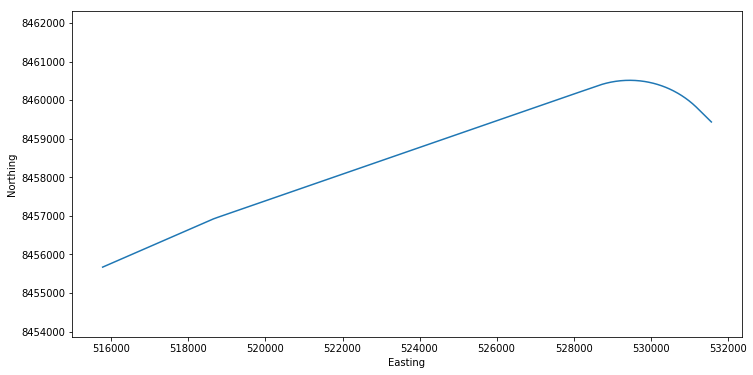

In [8]:
plt.plot(route_data['X center'], route_data['Y center']) # Plot the trace using the X center column and Y center column
plt.gca().set_aspect('equal', 'datalim')                 # Set the aspect ratio to 1
plt.gcf().set_size_inches(12,6)                          # increase the size of the plot to 12in by 6in
plt.xlabel('Easting')                                    # Set the x label
plt.ylabel('Northing')                                   # Set the y label

Another application would be the calculation of a moving average of the seabed level using an averaging window of 100m. The KPs are spaced 1m apart so the size of the rolling mean window is simply 100. Pandas does this with just one line of code using the ```rolling(period).mean``` function.

In [13]:
route_data['Z center smooth'] = route_data['Z center'].rolling(250).mean()

Text(0, 0.5, 'Seabed level')

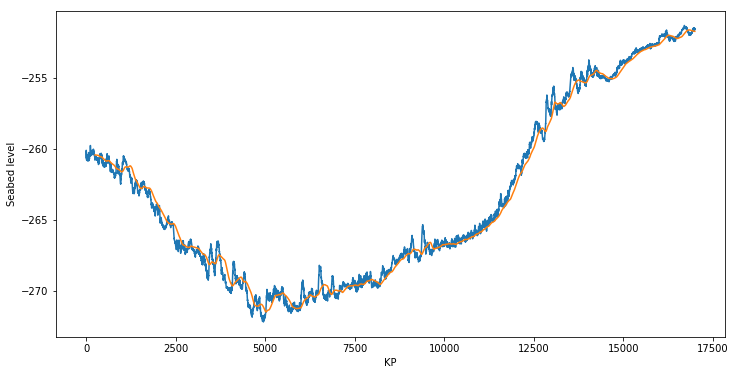

In [14]:
plt.plot(route_data['KP'], route_data['Z center'])        # Plot the unsmoothed data
plt.plot(route_data['KP'], route_data['Z center smooth']) # Plot the smoothed data
plt.gcf().set_size_inches(12,6)                           # increase the size of the plot to 12in by 6in
plt.xlabel('KP')                                          # Set the x label
plt.ylabel('Seabed level')                                # Set the y label

We can export the data with the additional column with smoothed data back to .csv or Excel. In Cathie Associates, Excel is usually prefered over csv for data storage so we will use the ```to_excel``` function here.

If there is a lot of data, writing can take a while.

In [15]:
route_data.to_excel("Output/Processed route data.xlsx")

## 3. Example 2: Importing Fugro Uniplot data

Fugro often distributes raw data from their Uniplot program. This data can also efficiently be read with Pandas. Identifying the row where data starts is crucial.

The Uniplot file is a fixed width file and we can use the Pandas function ```read_fwf```.

Import fixed width files is often a matter of opening an example file in a text editor, identifying the column widths and specifying them in the function. Often, there is a bit of trial and error for the first file as this is a less standardized file structure compared to .csv.

In [16]:
tbar_data = pd.read_fwf(
    'Data/Tbar data.asc',
    widths=[5, 10, 10, 10, 10],
    skiprows=74,
    names=['Rec', 'Depth [m]', 'Time [s]', 'qT push [MPa]', 'qT pull [MPa]'])

We can look at the first couple of rows. This shows that during the pushing phase, the column ```qT pull [MPa]``` is left blank.

In [17]:
tbar_data.head()

,Rec,Depth [m],Time [s],qT push [MPa],qT pull [MPa]
0,1062.0,0.000,312.88,0.0005,NaN
1,1063.0,0.005,313.13,0.0013,NaN
2,1064.0,0.010,313.38,0.0019,NaN
3,1065.0,0.014,313.63,0.0022,NaN
4,1066.0,0.020,313.88,0.0028,NaN


Looking at the bottom rows (```tail()```) shows that there are rows with NaN values.

In [18]:
tbar_data.tail()

,Rec,Depth [m],Time [s],qT push [MPa],qT pull [MPa]
3676,4829.0,0.010,1362.75,NaN,-0.000
3677,4830.0,0.006,1362.88,NaN,-0.001
3678,4831.0,0.001,1363.13,NaN,-0.001
3679,NaN,NaN,NaN,NaN,NaN
3680,NaN,NaN,NaN,NaN,NaN


Pandas allows us to easily get rid of them using the drop_na function. We will only drop the rows where the column ```Rec``` has a NaN value. We will use ```inplace=True``` to immediately save the result. Showing the tail again reveals that the data NaN rows are gone.

In [19]:
tbar_data.dropna(subset=['Rec',], inplace=True)
tbar_data.tail()

,Rec,Depth [m],Time [s],qT push [MPa],qT pull [MPa]
3674,4827.0,0.016,1362.13,NaN,0.000
3675,4828.0,0.015,1362.38,NaN,0.000
3676,4829.0,0.010,1362.75,NaN,-0.000
3677,4830.0,0.006,1362.88,NaN,-0.001
3678,4831.0,0.001,1363.13,NaN,-0.001


We can derive an undrained shear strenth from the Tbar data using a Tbar factor $ N_{Tbar} = 10.5 $. This kind of processing is very easy with Pandas.

In [20]:
tbar_data['Su push [kPa]'] = tbar_data['qT push [MPa]'] * 1000.0 / 10.5
tbar_data['Su pull [kPa]'] = tbar_data['qT pull [MPa]'] * 1000.0 / 10.5

In [21]:
tbar_data.head()

,Rec,Depth [m],Time [s],qT push [MPa],qT pull [MPa],Su push [kPa],Su pull [kPa]
0,1062.0,0.000,312.88,0.0005,NaN,0.047619,NaN
1,1063.0,0.005,313.13,0.0013,NaN,0.123810,NaN
2,1064.0,0.010,313.38,0.0019,NaN,0.180952,NaN
3,1065.0,0.014,313.63,0.0022,NaN,0.209524,NaN
4,1066.0,0.020,313.88,0.0028,NaN,0.266667,NaN


We can visualize the results. The plots show that the data have not been properly processed by Fugro. Only the first push is in the correct column, subsequent pushes have been placed in the ```qT pull [MPa]``` column.

Being able to detect such flaws in processing highlights the need for good follow-up of the SI contractor. Pandas allows us to detect this with just a few lines of code.

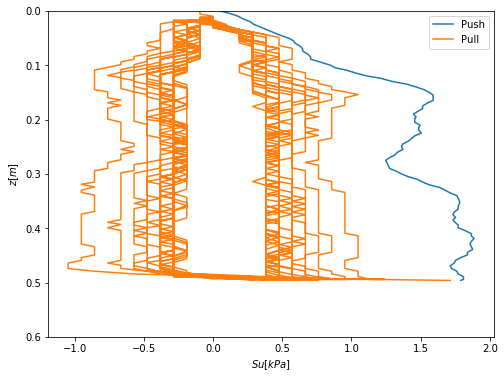

In [22]:
plt.plot(tbar_data['Su push [kPa]'], tbar_data['Depth [m]'], label="Push")        # Plot the unsmoothed data
plt.plot(tbar_data['Su pull [kPa]'], tbar_data['Depth [m]'], label="Pull")        # Plot the unsmoothed data
plt.gcf().set_size_inches(8,6)                           # increase the size of the plot to 8in by 6in
plt.ylim([0.6, 0.0])
plt.xlabel(r'$ Su [kPa]$')                                          # Set the x label
plt.ylabel(r'$ z [m] $')                                # Set the y label
plt.legend()

## 4. Reading WEAP files

Some file formats are notoriously difficult to work with. One example is WEAP .GWO files. These files are composed of multiple results tables in one file. We have up to 10 tables representing the stress profiles for a given ultimate resistance. At the end of the file, a summary defining the bearing graph is given.

Processing them requires a bit of coding skill. But if we do the effort once, we save a lot of time in the future. The benefit of processing .GWO files outside weap are clear, the graphing options in WEAP are just too limited for modern day applications.

We can start by reading the file and placing each line into a row of a pandas dataframe.

In [23]:
with open('Data/WEAP_RESULT.GWO') as f:
    weap_raw = pd.DataFrame(f.readlines(),columns=["GWO lines"])

Looking at the top few rows shows that this does note have any structure.

In [24]:
weap_raw.tail(20)

,GWO lines
690,41 -45436. 94802. -134.5 280.7 ...
691,42 -42958. 93285. -127.2 276.2 ...
692,43 -34126. 88902. -101.0 263.2 ...
693,44 -19621. 79271. -58.1 234.7 ...
694,\n
695,C338 Beatrice - Pile Refusal ...
696,Cathie Associates SA/NV ...
697,\n
698,Rut Bl Ct Stroke(eq.) Ten Str i t ...
699,kN b/m m MPa ...


### 4.1. Stress profiles

We need to find the lines where the stress profile results start. These lines start with ```'  No mxTForce'```. We can use the function ```str.startswith```in pandas. We can see that these lines are located at 189, 240, ...

Two lines below that line, the data starts.

In [25]:
indices = weap_raw[weap_raw["GWO lines"].str.startswith('  No mxTForce')].index
indices

Int64Index([189, 240, 291, 342, 393, 444, 495, 546, 597, 648], dtype='int64')

The line above contains the $ R_{ut} $ for which that stress profile is calculated. We can extract that using a regular expression. This identifies the pattern in which the $ R_{ut} $ is written in the line. Regular expressions are a powerful way of extracting data out of structured text. More info on regular expression is available via https://www.regex101.com.

In [26]:
import re
# Define the pattern of the line using regular expressions
# This regular expression allows whitespace before the text Rut= , followed by a decimal number and any number of remaining characters 
pattern = re.compile(r"^\s*Rut=\s*(?P<rult>\d*[.]?\d*).*$")
# Select the row containing Rut for the first set of data
r_ut_row_1 = weap_raw.iloc[indices[0]-1]
# Find the pattern rult in the string for the first set of results and save it
R_ult_1 = float(pattern.findall(r_ut_row_1[0])[0])
# Print the value of Rut
R_ult_1

5000.0

We can now <i>slice</i> the data, which means that we select only the numerical data between two indices. 

In [27]:
weap_raw[indices[0]+2:indices[1]-5]

,GWO lines
191,1 0. 55590. 0.0 164.6 ...
192,2 -8375. 55604. -24.8 164.6 ...
193,3 -14886. 55590. -44.1 164.6 ...
194,4 -19046. 55576. -56.4 164.6 ...
195,5 -21573. 55639. -63.9 164.7 ...
196,6 -23111. 55662. -68.4 164.8 ...
197,7 -24812. 55649. -73.5 164.8 ...
198,8 -26199. 55604. -77.6 164.6 ...
199,9 -26786. 55642. -79.3 164.8 ...
200,10 -27032. 55661. -80.0 164.8 ...


We can store the length of this data:

In [28]:
data_length = weap_raw[indices[0]+2:indices[1]-5].__len__()
data_length

44

We can now read the file again using the ```read_fwf``` function as the data is provided in fixed width format.

Et voila! The data we are after is returned!

In [29]:
weap_fwf = pd.read_fwf(
    "Data/WEAP_RESULT.GWO",
    widths=[4, 9, 11, 11, 10, 11, 10, 12], # Count the column width in a txt editor
    names=['No', 'mxTForce [kN]', 'mxCForce [kN]', 'mxTStress [MPa]', 'mxCStress [MPa]',
           'max V [m/s]', 'max D [mm]', 'max Et [kJ]']) # Column headers from the file
weap_rult_1 = weap_fwf[indices[0]+2:indices[0]+2+data_length]
weap_rult_1

,No,mxTForce [kN],mxCForce [kN],mxTStress [MPa],mxCStress [MPa],max V [m/s],max D [mm],max Et [kJ]
191,1,0.,55590.,0.0,164.6,5.40,98.3,1113.05
192,2,-8375.,55604.,-24.8,164.6,5.33,98.3,1114.39
193,3,-14886.,55590.,-44.1,164.6,5.21,98.3,1115.98
194,4,-19046.,55576.,-56.4,164.6,5.10,98.3,1117.62
195,5,-21573.,55639.,-63.9,164.7,4.96,98.3,1119.31
196,6,-23111.,55662.,-68.4,164.8,4.78,98.3,1121.05
197,7,-24812.,55649.,-73.5,164.8,4.61,98.3,1122.84
198,8,-26199.,55604.,-77.6,164.6,4.42,98.3,1124.66
199,9,-26786.,55642.,-79.3,164.8,4.38,98.3,1126.50
200,10,-27032.,55661.,-80.0,164.8,4.31,98.3,1128.32


We still need to convert this data to numeric data. 

In [30]:
weap_rult_1 = weap_rult_1.astype('float')

This data can be plotted:

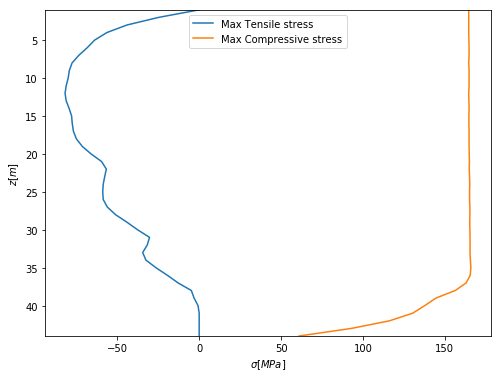

In [31]:
plt.plot(weap_rult_1['mxTStress [MPa]'], weap_rult_1['No'], label="Max Tensile stress") # Plot the tensile stresses in the pile
plt.plot(weap_rult_1['mxCStress [MPa]'], weap_rult_1['No'], label="Max Compressive stress") # Plot the compressive stresses in the pile
plt.gcf().set_size_inches(8,6)                           # increase the size of the plot to 8in by 6in
plt.ylim([weap_rult_1['No'].max(), weap_rult_1['No'].min()]) # Plot between maximum and minimum pile penetration
plt.xlabel(r'$ \sigma [MPa] $')                         # Set the x label
plt.ylabel(r'$ z [m] $')                                # Set the y label
plt.legend()

The code above is just for one value of $ R_{ut} $. We can use the power of Python to automate this and create a combined dataframe. We will loop over all indices and create dataframes.

In [32]:
dfs = [] # Create an empty list of dataframes
for i in indices:
    # Find Rut for the data under consideration
    r_ut_row = weap_raw.iloc[i-1]
    # Find the pattern rult in the string for the first set of results and save it
    r_ut = float(pattern.findall(r_ut_row[0])[0])
    # Read the data and immediately convert it to float
    data = weap_fwf[i+2:i+2+data_length].astype('float')
    # Add Rut to the data
    data.loc[:, "Rut [kN]"] = r_ut
    # Append the dataframe to the list of dataframes
    dfs.append(data)

We now have a list of dataframes containing the output for each individual $ R_{ut} $:

In [33]:
dfs

[       No  mxTForce [kN]  mxCForce [kN]  mxTStress [MPa]  mxCStress [MPa]  \
 191   1.0            0.0        55590.0              0.0            164.6   
 192   2.0        -8375.0        55604.0            -24.8            164.6   
 193   3.0       -14886.0        55590.0            -44.1            164.6   
 194   4.0       -19046.0        55576.0            -56.4            164.6   
 195   5.0       -21573.0        55639.0            -63.9            164.7   
 196   6.0       -23111.0        55662.0            -68.4            164.8   
 197   7.0       -24812.0        55649.0            -73.5            164.8   
 198   8.0       -26199.0        55604.0            -77.6            164.6   
 199   9.0       -26786.0        55642.0            -79.3            164.8   
 200  10.0       -27032.0        55661.0            -80.0            164.8   
 201  11.0       -27412.0        55644.0            -81.2            164.8   
 202  12.0       -27656.0        55595.0            -81.9       

We can simply put this data into one big dataframe using the ```concat``` function on pandas. We can also reset the index with ```reset_index```, this means that our rowcount starts from zero. We use ```drop=True``` to remove the original row number which were the row numbers in the file.

In [34]:
all_data = pd.concat(dfs).reset_index(drop=True)
all_data

,No,mxTForce [kN],mxCForce [kN],mxTStress [MPa],mxCStress [MPa],max V [m/s],max D [mm],max Et [kJ],Rut [kN]
0,1.0,0.0,55590.0,0.0,164.6,5.40,98.3,1113.05,5000.0
1,2.0,-8375.0,55604.0,-24.8,164.6,5.33,98.3,1114.39,5000.0
2,3.0,-14886.0,55590.0,-44.1,164.6,5.21,98.3,1115.98,5000.0
3,4.0,-19046.0,55576.0,-56.4,164.6,5.10,98.3,1117.62,5000.0
4,5.0,-21573.0,55639.0,-63.9,164.7,4.96,98.3,1119.31,5000.0
5,6.0,-23111.0,55662.0,-68.4,164.8,4.78,98.3,1121.05,5000.0
6,7.0,-24812.0,55649.0,-73.5,164.8,4.61,98.3,1122.84,5000.0
7,8.0,-26199.0,55604.0,-77.6,164.6,4.42,98.3,1124.66,5000.0
8,9.0,-26786.0,55642.0,-79.3,164.8,4.38,98.3,1126.50,5000.0
9,10.0,-27032.0,55661.0,-80.0,164.8,4.31,98.3,1128.32,5000.0


This data can be exported to Excel with one line of code:

In [35]:
all_data.to_excel("Output/cleaned_weap_data.xlsx")

### 4.2. Bearing graph

We also need to extract the data for the bearing graph. We will first search where this data starts:

In [36]:
summary_index = weap_raw[weap_raw["GWO lines"].str.startswith('     Rut   Bl Ct')].index[0]
summary_index

698

We can read the data, starting two lines below this line and defining the correct widths for the columns: 

In [37]:
bearinggraph_fwf = pd.read_fwf(
    "Data/WEAP_RESULT.GWO",
    widths=[8, 8, 12, 9, 4, 4, 8, 4, 4, 7], # Count the column width in a txt editor
    names=['Rut [kN]', 'Blowcount [blows/m]', 'Stroke [m]', 'Tensile stress [MPa]', 'Tensile i [-]',
           'Tensile t [-]', 'Compressive stress [MPa]', 'Compressive i [-]',
           'Compressive t [-]', 'ENTHRU [kJ]'],
    ) # Column headers from the file

This reads all the data, we can just extract the data we need for the bearing graph. At the same time, we can convert the numerical data into float format and reset the index to start from zero. Pandas allows us to concatenate these statements into one powerful expression. Checking the result shows that the bearing graph is extracted properly.

In [38]:
weap_bearinggraph = bearinggraph_fwf[summary_index+2:summary_index+2+10].astype('float').reset_index(drop=True)
weap_bearinggraph

,Rut [kN],Blowcount [blows/m],Stroke [m],Tensile stress [MPa],Tensile i [-],Tensile t [-],Compressive stress [MPa],Compressive i [-],Compressive t [-],ENTHRU [kJ]
0,5000.0,10.2,2.02,-81.89,12.0,19.0,165.89,35.0,10.0,1113.1
1,13555.6,25.7,2.02,-21.32,7.0,20.0,166.36,36.0,10.0,1112.9
2,22111.1,41.7,2.02,-20.83,40.0,50.0,174.89,40.0,11.0,1119.4
3,30666.7,60.6,2.02,-51.12,39.0,46.0,199.97,40.0,11.0,1110.1
4,39222.2,88.5,2.02,-72.47,37.0,45.0,222.05,41.0,11.0,1109.0
5,47777.8,129.6,2.02,-91.06,33.0,44.0,240.33,41.0,11.0,1108.7
6,56333.3,200.1,2.02,-107.55,29.0,44.0,254.73,41.0,11.0,1108.5
7,64888.9,314.2,2.02,-120.52,27.0,43.0,265.92,41.0,11.0,1107.8
8,73444.4,555.2,2.02,-130.51,27.0,43.0,274.54,41.0,11.0,1107.7
9,82000.0,1034.4,2.02,-138.60,26.0,43.0,280.71,41.0,11.0,1107.5


We can plot the bearing graph.

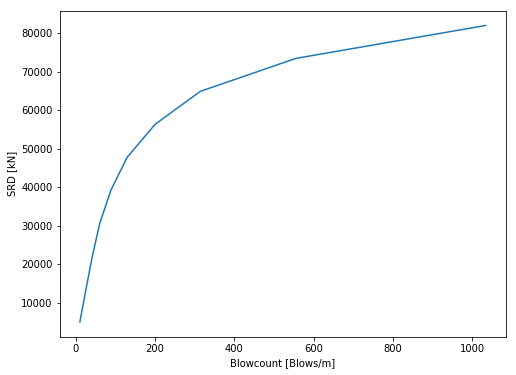

In [39]:
plt.plot(weap_bearinggraph['Blowcount [blows/m]'], weap_bearinggraph['Rut [kN]'])
plt.xlabel('Blowcount [Blows/m]')
plt.ylabel('SRD [kN]')
plt.gcf().set_size_inches(8, 6)

This processing is quite complex and hence, we have include a function in ```capy``` which hides a lot of that complexity:

In [40]:
from capy.general.file_reading import read_gwo

/anaconda3/envs/geotech37/lib/python3.6/site-packages/capysecurity-0.1.0-py3.6.egg/capysecurity/security.py:31: Warning: Development version
  warnings.warn("Development version", Warning)


The capy function ```read_gwo``` allows us to retrieve the results with one line of code. All we need to do is to provide the correct path to the .GWO file.

In [43]:
gwo_results = read_gwo(file_path="Data/WEAP_RESULT.GWO")

A dictionary with the keys ```bearing graph``` and ```stress profiles``` is returned. We can print the results to verify the behaviour.

In [44]:
gwo_results['bearing graph']

,Rut [kN],Blowcount [blows/m],Stroke [m],Tensile stress [MPa],Tensile i [-],Tensile t [-],Compressive stress [MPa],Compressive i [-],Compressive t [-],ENTHRU [kJ]
0,5000.0,10.2,2.02,-81.89,12.0,19.0,165.89,35.0,10.0,1113.1
1,13555.6,25.7,2.02,-21.32,7.0,20.0,166.36,36.0,10.0,1112.9
2,22111.1,41.7,2.02,-20.83,40.0,50.0,174.89,40.0,11.0,1119.4
3,30666.7,60.6,2.02,-51.12,39.0,46.0,199.97,40.0,11.0,1110.1
4,39222.2,88.5,2.02,-72.47,37.0,45.0,222.05,41.0,11.0,1109.0
5,47777.8,129.6,2.02,-91.06,33.0,44.0,240.33,41.0,11.0,1108.7
6,56333.3,200.1,2.02,-107.55,29.0,44.0,254.73,41.0,11.0,1108.5
7,64888.9,314.2,2.02,-120.52,27.0,43.0,265.92,41.0,11.0,1107.8
8,73444.4,555.2,2.02,-130.51,27.0,43.0,274.54,41.0,11.0,1107.7
9,82000.0,1034.4,2.02,-138.60,26.0,43.0,280.71,41.0,11.0,1107.5


In [45]:
gwo_results['stress profiles'].head()

,No,mxTForce [kN],mxCForce [kN],mxTStress [MPa],mxCStress [MPa],max V [m/s],max D [mm],max Et [kJ],Rut [kN]
0,1.0,0.0,55590.0,0.0,164.6,5.40,98.3,1113.05,5000.0
1,2.0,-8375.0,55604.0,-24.8,164.6,5.33,98.3,1114.39,5000.0
2,3.0,-14886.0,55590.0,-44.1,164.6,5.21,98.3,1115.98,5000.0
3,4.0,-19046.0,55576.0,-56.4,164.6,5.10,98.3,1117.62,5000.0
4,5.0,-21573.0,55639.0,-63.9,164.7,4.96,98.3,1119.31,5000.0


## 5. Reading AGS files

AGS files are a common way of transferring geotechnical data. These files have multiple data tables in them. To create pandas dataframes from the files, we will need to find the appropriate section of the file and read it as csv.

In the example, we will read the PCPT data from an AGS file.

In [33]:
with open('Data/example_PCPT.ags') as f:
    ags_raw = pd.DataFrame(f.readlines(),columns=["AGS lines"])

We need to find the section with CPT data. This section begins with the line:

```
"GROUP","SCPT"
```

We can create a bit of general code to find the line where any group starts.

In [34]:
GROUPNAME = "SCPT"

In [35]:
start_index = ags_raw[ags_raw['AGS lines'].str.startswith(r'"GROUP","%s"' % GROUPNAME)].index[0]
print("The data for group %s starts on line %i" % (GROUPNAME, start_index))

The data for group SCPT starts on line 1125


The data does not always continue to the end of the file. We need to continue until we hit the next blank line:

In [36]:
empty_rows = ags_raw[ags_raw['AGS lines'] == "\n"]
end_index = empty_rows[empty_rows.index > start_index].index[0]
print("The data for group %s ends on line %i" % (GROUPNAME, end_index))

The data for group SCPT ends on line 45476


Reading the data is trivial:

In [8]:
group_data = pd.read_csv("Data/example_PCPT.ags", skiprows=start_index+1, nrows=end_index - start_index-2)
group_data.head(20)

NameError: name 'pd' is not defined

In [38]:
with open('Data/example_PCPT.ags') as f:
    ags_raw = pd.DataFrame(f.readlines(),columns=["AGS lines"])
start_index = ags_raw[ags_raw['AGS lines'].str.startswith(r'"GROUP","%s"' % GROUPNAME)].index[0]
empty_rows = ags_raw[ags_raw['AGS lines'] == "\n"]
end_index = empty_rows[empty_rows.index > start_index].index[0]
group_data = pd.read_csv("Data/example_PCPT.ags", skiprows=start_index+1, nrows=end_index - start_index-2)
group_data

,HEADING,LOCA_ID,SCPG_TESN,SCPT_DPTH,SCPT_RES,SCPT_FRES,SCPT_PWP2,SCPT_FRR
0,UNIT,NaN,NaN,m,MPa,MPa,MPa,%
1,TYPE,ID,X,2DP,3DP,4DP,4DP,2DP
2,DATA,B12-13-14-15C-A,CPT_1,0.00,0.022,NaN,NaN,NaN
3,DATA,B12-13-14-15C-A,CPT_1,0.02,0.107,NaN,0.0244,NaN
4,DATA,B12-13-14-15C-A,CPT_1,0.04,0.180,NaN,0.0241,NaN
5,DATA,B12-13-14-15C-A,CPT_1,0.06,0.218,0.0015,0.0243,0.71
6,DATA,B12-13-14-15C-A,CPT_1,0.08,0.257,0.0018,0.0246,0.76
7,DATA,B12-13-14-15C-A,CPT_1,0.10,0.309,0.0022,0.0248,0.76
8,DATA,B12-13-14-15C-A,CPT_1,0.12,0.383,0.0028,0.0249,0.81
9,DATA,B12-13-14-15C-A,CPT_1,0.14,0.468,0.0024,0.0250,0.57


We are not quite there yet as we need to combine the three first rows into a single header row. We can do this by creating a new list with column names.

At the same time, we can convert the columns with numerical data to the correct ```float``` datatype.

In [39]:
new_headers = []
datatypes = dict()
for i, original_header in enumerate(group_data.columns):
    new_name = "%s [%s]" % (original_header, group_data.loc[0, original_header])
    new_headers.append(new_name)
    if "DP" in group_data.loc[1, original_header]:
        datatypes[new_name] = 'float'
group_data.columns = new_headers

And then we drop the first two rows. At the same time, we also reset the index to start at zero and change the type of the numerical columns.

In [40]:
group_data = group_data[2:].reset_index(drop=True).astype(datatypes)

We can have a look at our cleaned data:

In [41]:
group_data.head()

,HEADING [UNIT],LOCA_ID [nan],SCPG_TESN [nan],SCPT_DPTH [m],SCPT_RES [MPa],SCPT_FRES [MPa],SCPT_PWP2 [MPa],SCPT_FRR [%]
0,DATA,B12-13-14-15C-A,CPT_1,0.00,0.022,NaN,NaN,NaN
1,DATA,B12-13-14-15C-A,CPT_1,0.02,0.107,NaN,0.0244,NaN
2,DATA,B12-13-14-15C-A,CPT_1,0.04,0.180,NaN,0.0241,NaN
3,DATA,B12-13-14-15C-A,CPT_1,0.06,0.218,0.0015,0.0243,0.71
4,DATA,B12-13-14-15C-A,CPT_1,0.08,0.257,0.0018,0.0246,0.76


And export it to Excel. If you have a lot of CPT data, this can take a while. Further processing in Python is then also more efficient.

In [42]:
group_data.to_excel("Output/cpt_data_ags.xlsx")

This processing is actually quite complex and hence we have created a function in ```capy``` which hides most of the complexity.

In [46]:
from capy.general.file_reading import read_ags

With this function, we can read the relevant section of the AGS file with one line of code. We need to provide the correct file path and the groupname to be read.

In [47]:
ags_result = read_ags(file_path="Data/example_PCPT.ags", groupname="SCPT")

The result is a Pandas dataframe and we can examine the first 10 lines:

In [48]:
ags_result.head(10)

,HEADING [UNIT],LOCA_ID [nan],SCPG_TESN [nan],SCPT_DPTH [m],SCPT_RES [MPa],SCPT_FRES [MPa],SCPT_PWP2 [MPa],SCPT_FRR [%]
0,DATA,B12-13-14-15C-A,CPT_1,0.00,0.022,NaN,NaN,NaN
1,DATA,B12-13-14-15C-A,CPT_1,0.02,0.107,NaN,0.0244,NaN
2,DATA,B12-13-14-15C-A,CPT_1,0.04,0.180,NaN,0.0241,NaN
3,DATA,B12-13-14-15C-A,CPT_1,0.06,0.218,0.0015,0.0243,0.71
4,DATA,B12-13-14-15C-A,CPT_1,0.08,0.257,0.0018,0.0246,0.76
5,DATA,B12-13-14-15C-A,CPT_1,0.10,0.309,0.0022,0.0248,0.76
6,DATA,B12-13-14-15C-A,CPT_1,0.12,0.383,0.0028,0.0249,0.81
7,DATA,B12-13-14-15C-A,CPT_1,0.14,0.468,0.0024,0.0250,0.57
8,DATA,B12-13-14-15C-A,CPT_1,0.16,0.551,0.0028,0.0251,0.55
9,DATA,B12-13-14-15C-A,CPT_1,0.18,0.625,0.0032,0.0255,0.53


In [49]:
ags_result.to_excel("Output/ags_example_output.xlsx")

## 6. Conclusions

With the Pandas library, Python becomes a very powerful data reading, processing and writing tool. Any engineering task which involves reading structured text files can be automated using the functions available in Pandas.

The next release of capy (v0.1.8) will include routines for GWO and AGS file reading without needing to duplicate all the code given in this notebook.

You can use the recipes in this notebook as a starting point for your own project. The Pandas documentation (http://pandas.pydata.org/pandas-docs/stable/) can always be consulted for more info. StackOverFlow is a very good place to find practical help from the community (https://stackoverflow.com/questions/tagged/pandas). The Practical Business Python website has plently of useful examples and articles (http://pbpython.com/excel-pandas-comp.html).

Oh, and you did not think I was going to pass on the opportunity of including a picture of a panda, did you?

<img src="Images/baby_panda.jpg">